In [8]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
import pickle
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import math


In [11]:
pickle_file = open('all_sentences_list', 'rb')
sentences = pickle.load(pickle_file)

In [12]:
num_words = 0
for sentence in sentences:
    for word in sentence:
        num_words += 1
print(num_words)
print((num_words)/9908)

17405356
1756.6972143722244


In [ ]:
type(stopwords.words('english'))

In [ ]:
''' REMOVING STOPWORDS'''
sentences_without_stopwords = []
stopwords = stopwords.words('english')
for sent in sentences:
    filtered_sentence = []
    for word in sent:
        if word not in stopwords:
            filtered_sentence.append(word)
    if len(filtered_sentence) != 0:
        sentences_without_stopwords.append(filtered_sentence)

In [ ]:
'''HOW MANY UNIQUE WORDS ARE THERE?'''
words_set = set()
for sent in sentences_without_stopwords:
    for word in sent:
        words_set.add(word)

In [23]:
max([len(sent) for sent in sentences_without_stopwords])

445

In [13]:
model = gensim.models.Word2Vec(
    sentences,
    size=150,
    window=10,
    min_count=2,
    workers=10)

In [14]:
len(model.wv.vocab)

23037

In [15]:
model.train(sentences, total_examples=len(sentences), epochs=20)

(287667902, 348107120)

In [16]:
model.wv.save('wordembeddings_dim150_window_10_withstopwords')
#model = gensim.models.KeyedVectors.load("wordembeddings_dim150_window_10_nostopwords")

C:\app\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
w1 = "diarreha"
print("Most similar to {0}".format(w1), model.wv.most_similar(positive=w1))

Most similar to diarreha [('eraly', 0.4080147445201874), ('vomitng', 0.4038182497024536), ('hjematuria', 0.3886288106441498), ('bleediing', 0.3874030113220215), ('headahes', 0.3775545358657837), ('diificile', 0.3635501563549042), ('itchness', 0.3635483682155609), ('heartburn', 0.3615174889564514), ('cigarrettes', 0.3558814227581024), ('miinimal', 0.35528308153152466)]


Most similar to cancer [('carcinoma', 0.6643728017807007), ('adenocarcinoma', 0.5241678953170776), ('adenoca', 0.5071998834609985), ('cancers', 0.45996707677841187), ('lestions', 0.43998411297798157), ('supported', 0.43915027379989624), ('adenocarcnioma', 0.4324039816856384), ('scc', 0.4275120496749878), ('pepper', 0.4258141815662384), ('lutathera', 0.41655832529067993)]

In [39]:
def distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)


def removeOutliers(a, indexlist, outlierConstant):
    x_arr = a[:, 0]
    y_arr = a[:, 1]
    x_mean = np.mean(x_arr)
    y_mean = np.mean(y_arr)
    x_std = np.std(x_arr)
    y_std = np.std(y_arr)
    outlier_dist_from_mean = outlierConstant * math.sqrt(x_std**2+y_std**2)
    row = 0
    while row < np.size(a, 0):
        if distance(a[row][0], a[row][1], x_mean, y_mean) > outlier_dist_from_mean:
            a = np.delete(a, row, axis=0)
            del indexlist[row]
            row = row - 1
        row = row + 1
    return a
    
def word_embedding_visualization(gensim_model):
    words = []
    vectors = []
    for word in model.wv.vocab.keys():
        words.append(word)
        vectors.append(model.wv[word])
    np_vectors = np.asarray(vectors)
    mask = np.random.choice([False, True], len(np_vectors), p=[0.998, 0.002])
    np_vectors_sampled = np_vectors[mask]
    index_list = [i for i in range(len(mask)) if mask[i]]
    np_vectors_embedded =  TSNE(n_components=2, method='barnes_hut').fit_transform(np_vectors_sampled)
    np_vectors_embedded_no_outliers = removeOutliers(np_vectors_embedded, index_list, 2)
    plt.rcParams.update({'font.size': 24})
    for t, ind in enumerate(index_list):
        plt.text(np_vectors_embedded_no_outliers[t][0], np_vectors_embedded_no_outliers[t][1], words[ind])
    plt.rcParams["figure.figsize"] = (15, 15)
    plt.xlim(1.2 * np_vectors_embedded_no_outliers.min(), 1.3 * np_vectors_embedded_no_outliers.max())
    plt.ylim(1.2 * np_vectors_embedded_no_outliers.min(), 1.3 * np_vectors_embedded_no_outliers.max())
    plt.title('Scatterplot Representing a 0.2% Random Sample of the Vocabulary')
    plt.show() 

C:\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


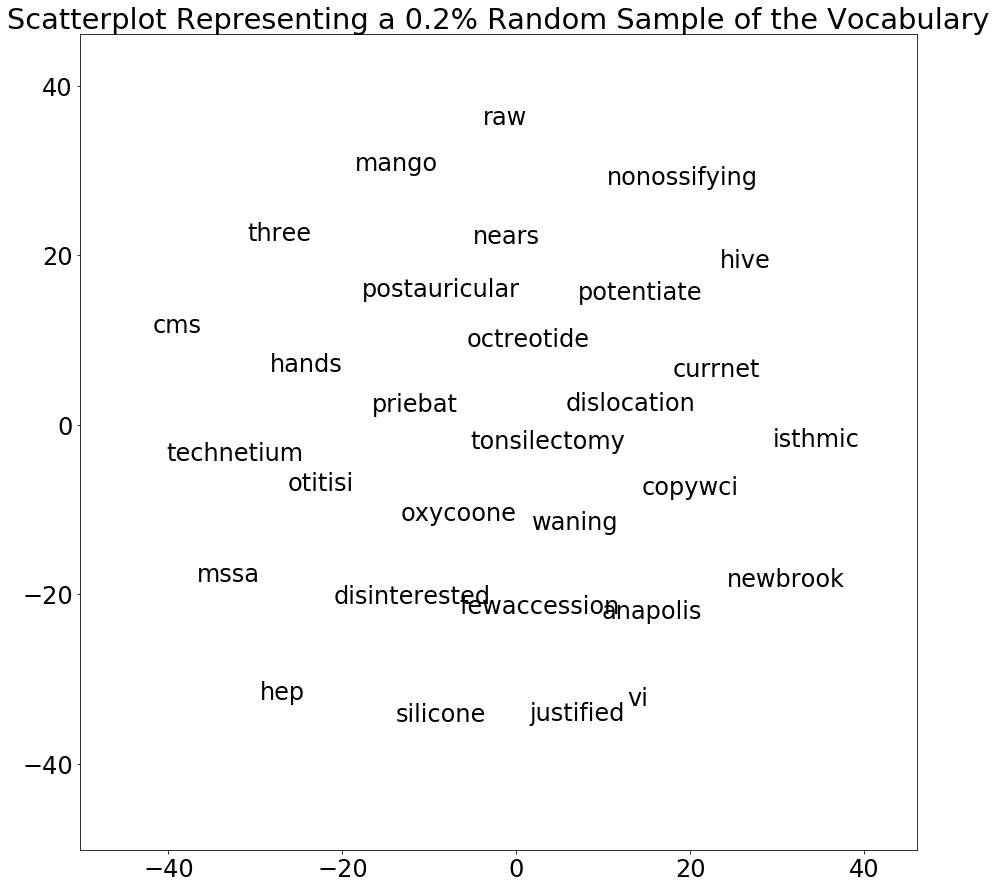

In [40]:
word_embedding_visualization(model)